# Analysis of market of Electric vehicles 

This is a project which analyses the data of Electric vehicles and how their distribution of sales lies in the present market. From an analytics point of view, it is mostly data wrangling and exploratory data analysis focusing primarily on descriptive analytics. Though in the final segment of the project, a prediction is made for the growth of EVs in the next 10 years based on an exponential function which runs on the present data of EV registrations. 

The project answers the following questions:

* How has the production of EVs has increased over the years?
* Find the top 3 counties and the respective cities inside those counties that have the highest EV registrations?
* Compare Battery powered Electric vehicles to Plug-in Hybrid Electric Vehicles.
* Compare the Top manufacturers of EVs based on the sale of their EVs.
* Compare the models of Top 3 EV selling companies by Registrations counts/sales.
* Analyse how the number of EV registrations change as the Electric range of an EV increases/decreases.
* Analyse how Electric range of EVs increase/decrease over the years.
* Analyse market size and forecast the growth in EV sales for the next 10 years.

## Preparing the Environment: 

We prepare the environment with the import of necessary libraries required for the project. Then, we load the dataset and start cleaning it.

In [1]:
#import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

## Loading the dataset:

In [2]:
data = pd.read_csv("Downloads/Electric_Vehicle_Population_Data.csv")

## Assess data: 

In [3]:
#View first 5 rows
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [4]:
# Basic information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

Handle missing values:

In [5]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [6]:
data.dropna(axis=0,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190989 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         190989 non-null  object 
 1   County                                             190989 non-null  object 
 2   City                                               190989 non-null  object 
 3   State                                              190989 non-null  object 
 4   Postal Code                                        190989 non-null  float64
 5   Model Year                                         190989 non-null  int64  
 6   Make                                               190989 non-null  object 
 7   Model                                              190989 non-null  object 
 8   Electric Vehicle Type                              190989 non-null  object 
 9 

## Handle Duplicate rows:

In [8]:
data.duplicated().sum()

np.int64(0)

## Question 1. How has the production of EVs has increased over the years?

C:\Users\ocine\AppData\Local\Temp\ipykernel_19952\2228894784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_cars_production_over_time.index,y = ev_cars_production_over_time.values,palette = 'Blues')


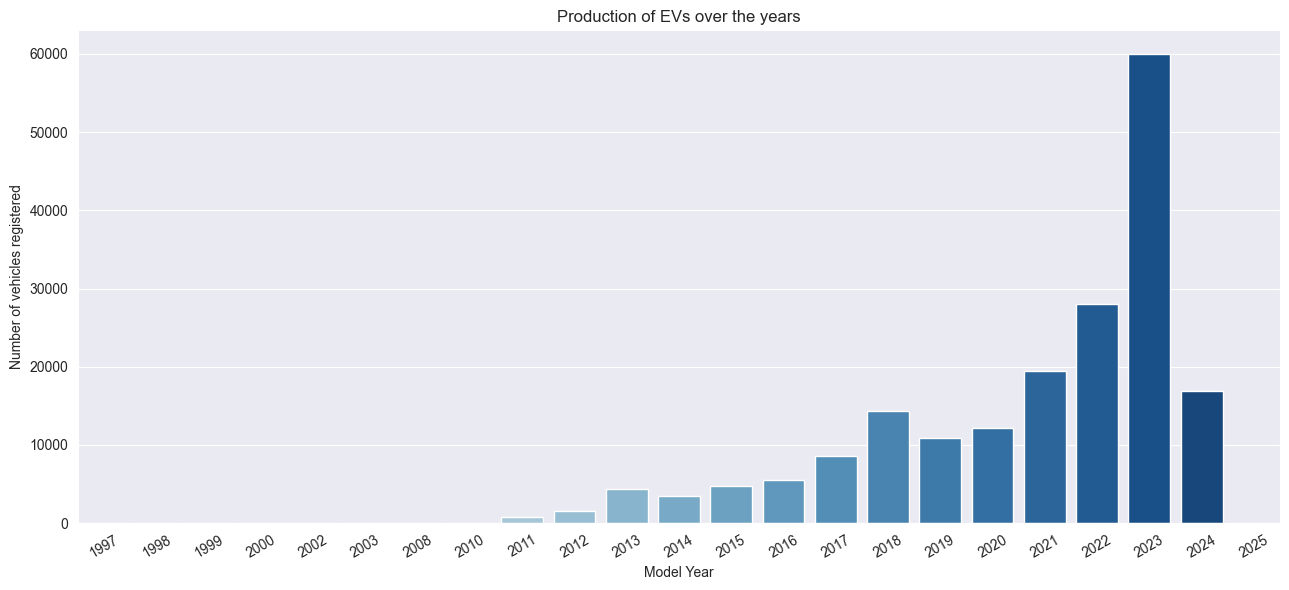

In [9]:
sns.set_style("darkgrid")
ev_cars_production_over_time = data["Model Year"].value_counts().sort_index()
plt.figure(figsize=(13,6))
sns.barplot(x = ev_cars_production_over_time.index,y = ev_cars_production_over_time.values,palette = 'Blues')
plt.title('Production of EVs over the years')
plt.xlabel('Model Year')
plt.ylabel('Number of vehicles registered')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

From the bar chart, it evident that over the years, the production has steadily increased with noticeable selling in 2018 and a major growth in 2023. Sale of EV in 2023 is almost double to that in 2022. The data for the years 2024 is not complete. For 2025, it's zero. EV registrations are highest for the year 2023 which means that EVs are being adopted by people with time.

## Question 2. Find the top 3 counties and the respective cities inside those counties that have the highest EV registrations?

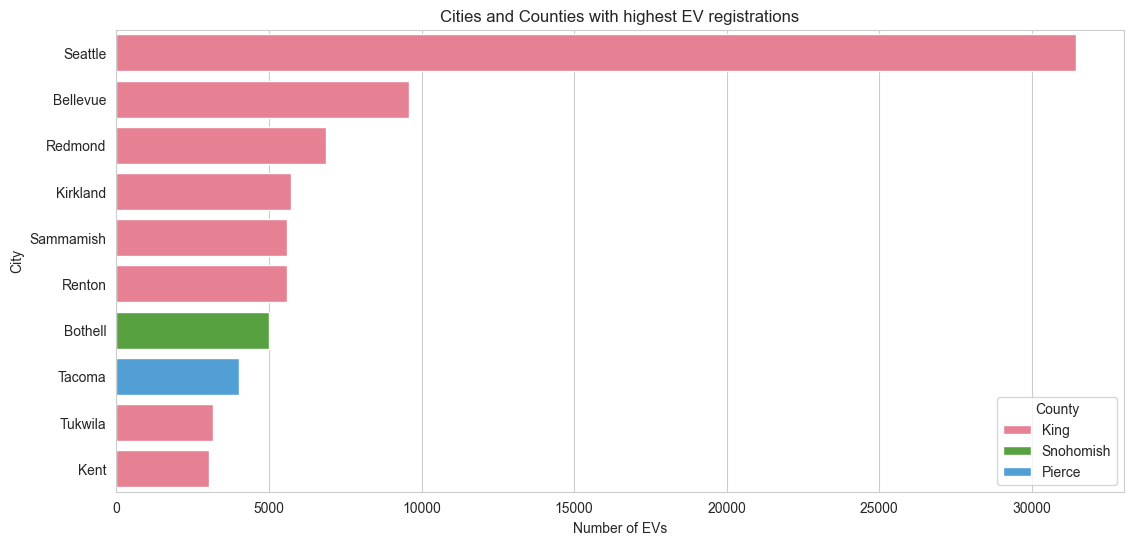

In [10]:
top_counties = data["County"].value_counts().head(3).index
top_counties_data = data[data["County"].isin(top_counties)]
top_counties_data

city_distribution_top_counties = top_counties_data.groupby(["County","City"]).size().sort_values(ascending=False).reset_index().rename(columns={0:"Number of EVs"})

plt.figure(figsize=(13,6))
sns.set_style("whitegrid")
sns.barplot(x="Number of EVs",y="City",data=city_distribution_top_counties.head(10),hue="County",palette = 'husl')
plt.title("Cities and Counties with highest EV registrations")
plt.show()

The top 3 counties are King, Snohomish and Pierce. The top 10 cities in these counties with highest EV registrations is plotted in the horizontal bar chart above. It is clear that Seattle has the highest EV registrations, almost triple to that of the second one - Bellevue. It is also evident that King county has 8 out of 10 cities in the top 10 city bar chart.

## Question 3. Compare Battery powered Electric vehicles to Plug-in Hybrid Electric Vehicles.

C:\Users\ocine\AppData\Local\Temp\ipykernel_19952\4013188036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Electric Vehicle Type", x="count",data = vehicle_type_data, palette = 'Blues')


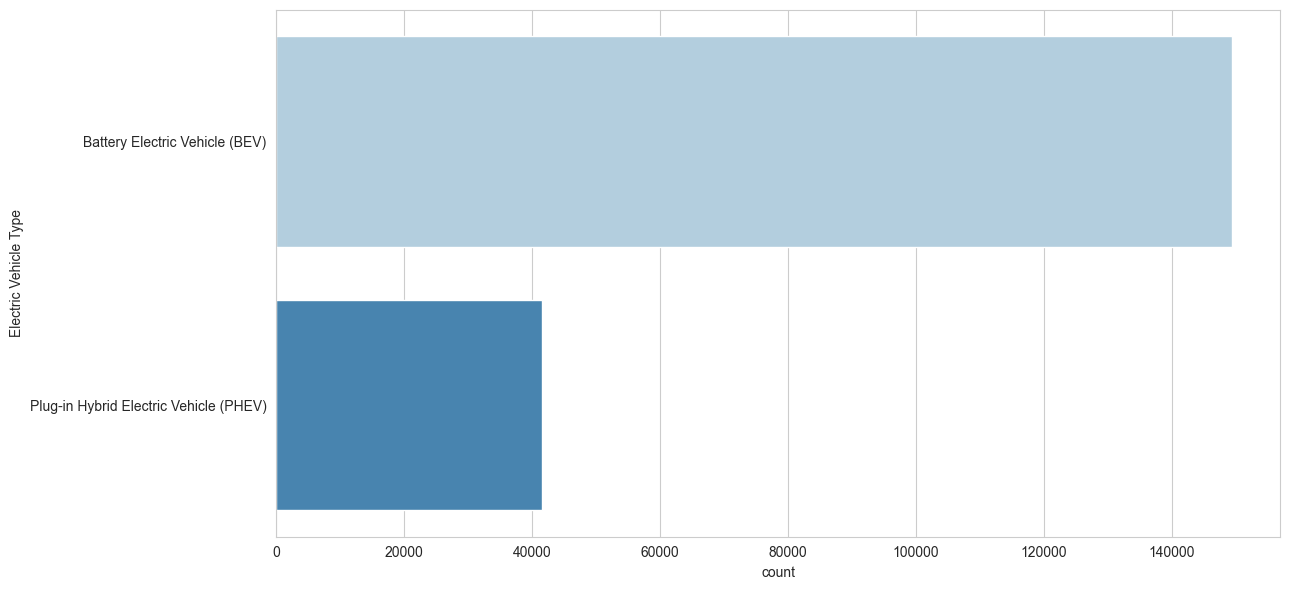

In [11]:
vehicle_type_data = data["Electric Vehicle Type"].value_counts().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(13,6))
sns.barplot(y="Electric Vehicle Type", x="count",data = vehicle_type_data, palette = 'Blues')
plt.tight_layout()
plt.show()

It seems that Battery powered EVs are preferred over plug-in hybrid EVs.

## Question 4. Compare the Top manufacturers of EVs based on the sale of their EVs.

**Top 3 manufacturers:**

In [12]:
top3_popular_manufacturers = data["Make"].value_counts().head(3).reset_index()
top3_popular_manufacturers

,Make,count
0,TESLA,84464
1,CHEVROLET,14293
2,NISSAN,14225


**Top 10 manufacturers and their sales:**

C:\Users\ocine\AppData\Local\Temp\ipykernel_19952\3395965402.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_manufacturers["Make"],y=popular_manufacturers["count"],palette='husl')


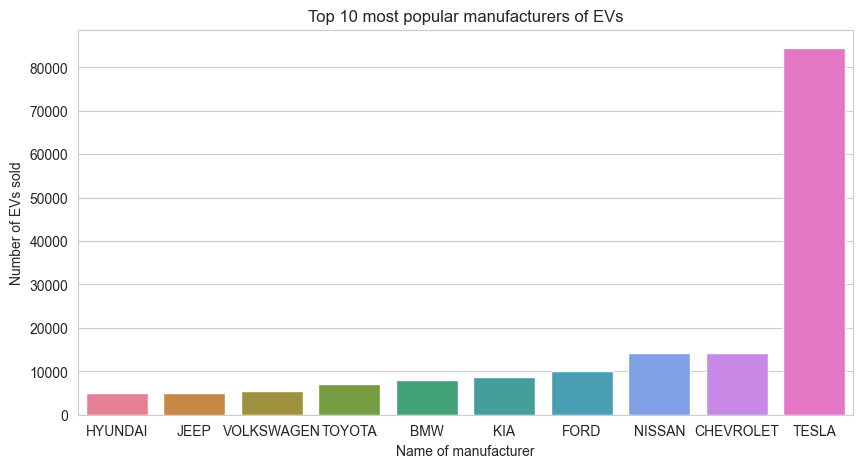

In [13]:
popular_manufacturers = data["Make"].value_counts().head(10).reset_index()
popular_manufacturers.sort_values(by="count",ascending=True,inplace=True)
plt.figure(figsize=(10,5))
sns.barplot(x=popular_manufacturers["Make"],y=popular_manufacturers["count"],palette='husl')
plt.title("Top 10 most popular manufacturers of EVs")
plt.xlabel("Name of manufacturer")
plt.ylabel("Number of EVs sold")
plt.show()

Tesla definitely leads all other car companies by a significant margin. This indicates the popularity of Tesla brand in the EV segment of cars.

## Question 5. Compare the models of Top 3 EV selling companies by Registrations counts/sales.

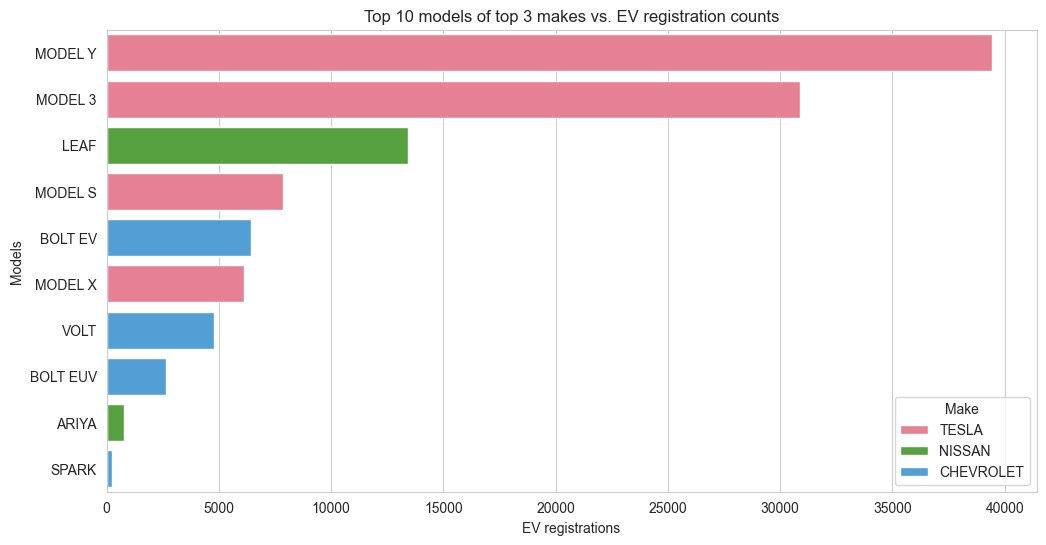

In [14]:
top_models_data = data[data["Make"].isin(top3_popular_manufacturers["Make"])]
top_models_with_make_data = top_models_data.groupby(["Make","Model"]).size().reset_index().rename(columns={0:"Count"}).sort_values(by = "Count",ascending = False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(y =top_models_with_make_data["Model"],x= top_models_with_make_data["Count"], hue = top_models_with_make_data["Make"], palette = "husl")
plt.title("Top 10 models of top 3 makes vs. EV registration counts")
plt.xlabel("EV registrations")
plt.ylabel("Models")
plt.show()

Model Y and Model 3 from Tesla seem to be the most popular. Nissan's Leaf stands at third position. 

## Question 6. Analyse how the number of EV registrations change as the Electric range of an EV increases/decreases.

C:\Users\ocine\AppData\Local\Temp\ipykernel_19952\3010453294.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


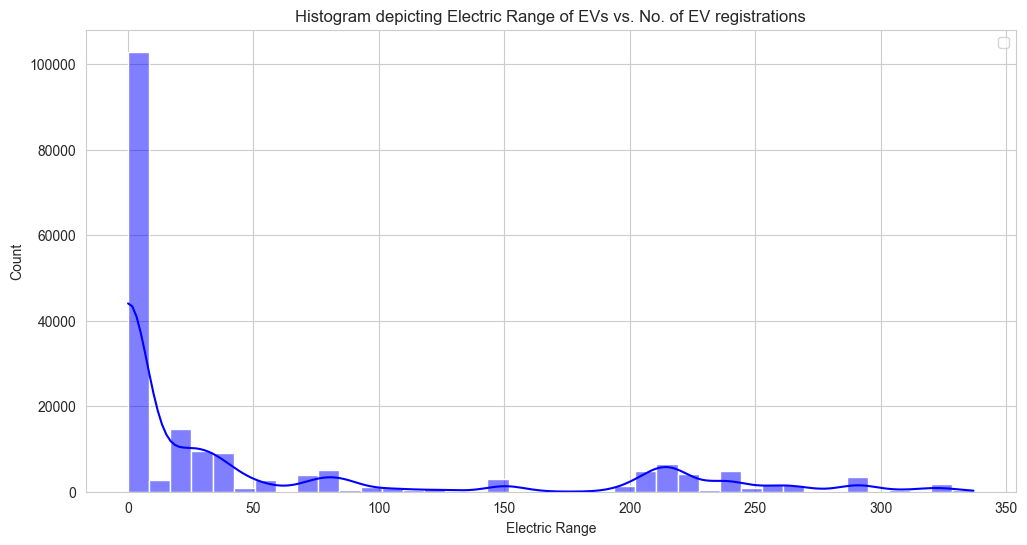

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(data["Electric Range"],bins=40,color="blue",kde="true")
plt.title("Histogram depicting Electric Range of EVs vs. No. of EV registrations")
plt.legend()
plt.show()

In [16]:
 A high number of EVs sold have a low range. Most of the EV registrations are in the electric range between 0-50 miles though EVs are available with range upto 350 miles.

SyntaxError: invalid syntax (1164568576.py, line 1)

## Question7. Analyse how Electric range of EVs increase/decrease over the years

In [ ]:
modelyear_wise_electricrange_data = data.groupby("Model Year")["Electric Range"].mean().reset_index()   
plt.figure(figsize=(12,5))
sns.lineplot(x="Model Year",y="Electric Range",data=modelyear_wise_electricrange_data)
plt.show()

In [ ]:
Electric range of EV models increased upto 2010 followed by a bump between 2010-2015 and increased again in 2020. The phase 2010-15 might mean introduction of EV models with lower ranges and better other features which could have led to better sales. Post 2020, there is another bump which might mean that there is a lack of data.

## Question 7. Analyse the Top selling models w.r.t. Elecrtic Range.

In [ ]:
models_and_electricrange_data = top_models_data.groupby(["Make","Model"])["Electric Range"].mean().reset_index().sort_values(by="Electric Range",ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y = models_and_electricrange_data["Model"],x = models_and_electricrange_data["Electric Range"],hue = models_and_electricrange_data["Make"],palette="husl")
plt.show()

Though the highest selling Tesla model is the Model Y, the highest electric range is of Tesla's Roadster and Model S. In fact, Model Y's electric range is the least out of the Top 10 selling models. This suggests that Electric Range is not a primary indicator of sales and there may be other factors at play. 

## Question 8. Analyse market size and forecast the growth in EV sales in the next 10 years.


**Growth in EV sales over the years**

In [17]:
#Displays EV registration counts from 1997-2023

registration_counts = data['Model Year'].value_counts().sort_index(ascending = True)
registration_counts_df = pd.DataFrame(registration_counts)
registration_counts_df.drop([2024,2025],inplace=True)                              #Data for 2024 and 2025 is dropped as it is incomplete
print (registration_counts_df)

            count
Model Year       
1997            1
1998            1
1999            5
2000            7
2002            2
2003            1
2008           21
2010           24
2011          736
2012         1592
2013         4356
2014         3521
2015         4802
2016         5517
2017         8625
2018        14303
2019        10902
2020        12112
2021        19462
2022        28045
2023        60004


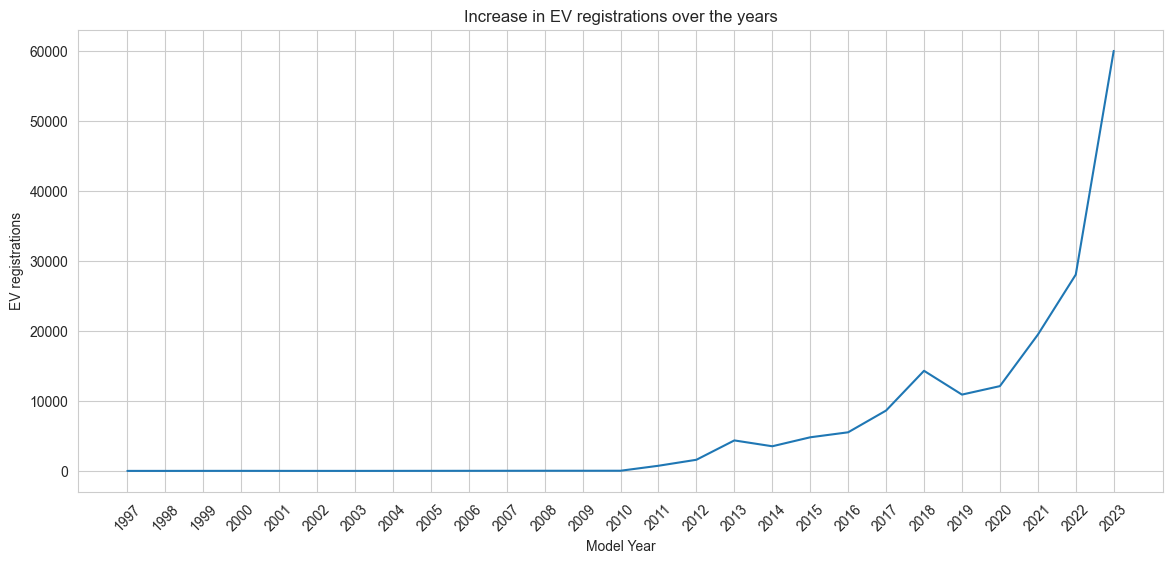

In [18]:
plt.figure(figsize=(14,6))
sns.lineplot(x="Model Year",y="count",data = registration_counts_df)
plt.title("Increase in EV registrations over the years")
plt.ylabel("EV registrations")
plt.xticks(rotation = 45)
plt.xticks(np.arange(1997,2024,1))
plt.show()

**Forecasting the EV sales in the next 10 years using an exponential function**

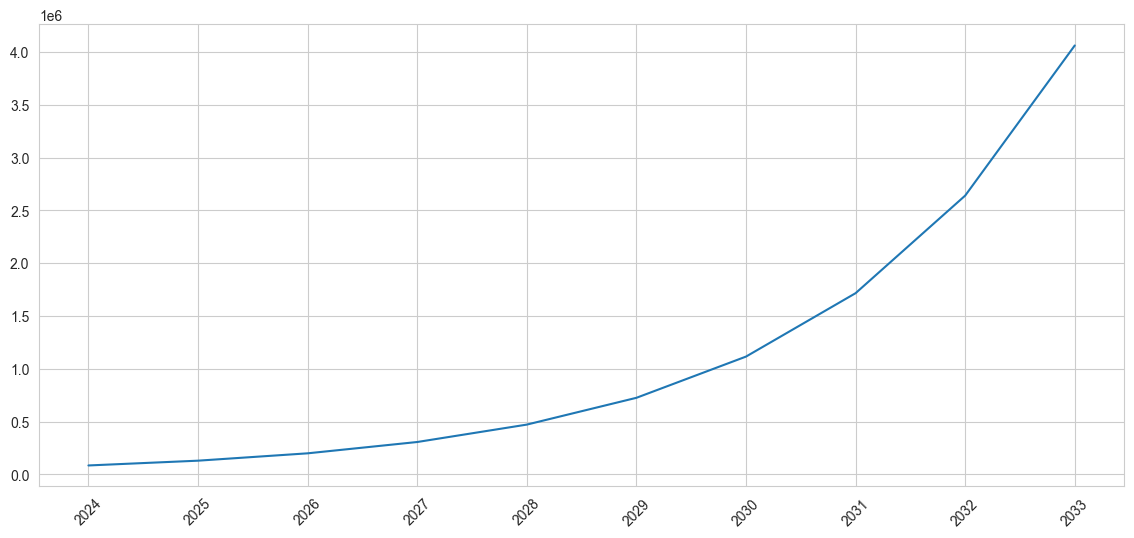

,year,projected_EV_registrations
,0,0
0,2024,8.407642e+04
1,2025,1.293637e+05
2,2026,1.990447e+05
3,2027,3.062590e+05
4,2028,4.712237e+05
5,2029,7.250456e+05
6,2030,1.115587e+06
7,2031,1.716492e+06
8,2032,2.641070e+06


In [19]:
def exp_function(x,a,b):
    return a*np.exp(b*x)

x_data = registration_counts_df.index - registration_counts_df.index.min()
y_data = registration_counts_df.values.flatten()

params,covariance = curve_fit(exp_function, x_data,y_data)                               #This is a function from Scipy module which will return the coefficients/parameters of the exponential function based on x_data and y_data. It also return covariance value between x_data and y_data.

forecasted_years = np.arange(2024,2024+10,1) - registration_counts_df.index.min()

forecasted_EV_registrations = exp_function(forecasted_years,params[0],params[1])          #params[0] and params[1] signify coefficients/parameters for the exponential function


forecasted_data = pd.concat([pd.DataFrame(forecasted_years + registration_counts_df.index.min()),pd.DataFrame(forecasted_EV_registrations)],axis=1,keys=["year","projected_EV_registrations"])

plt.figure(figsize=(14,6))
plt.plot(forecasted_years + registration_counts_df.index.min(),forecasted_EV_registrations)
plt.xticks(rotation=45)
plt.xticks(np.arange(2024,2024+10,1))
plt.show()

forecasted_data                                                                           #Table to show the projections/forecasted values

The chart above shows a steady exponential increase in EV registrations from 2024-2033, as expected. 

**Plotting the forecasted values with current values**

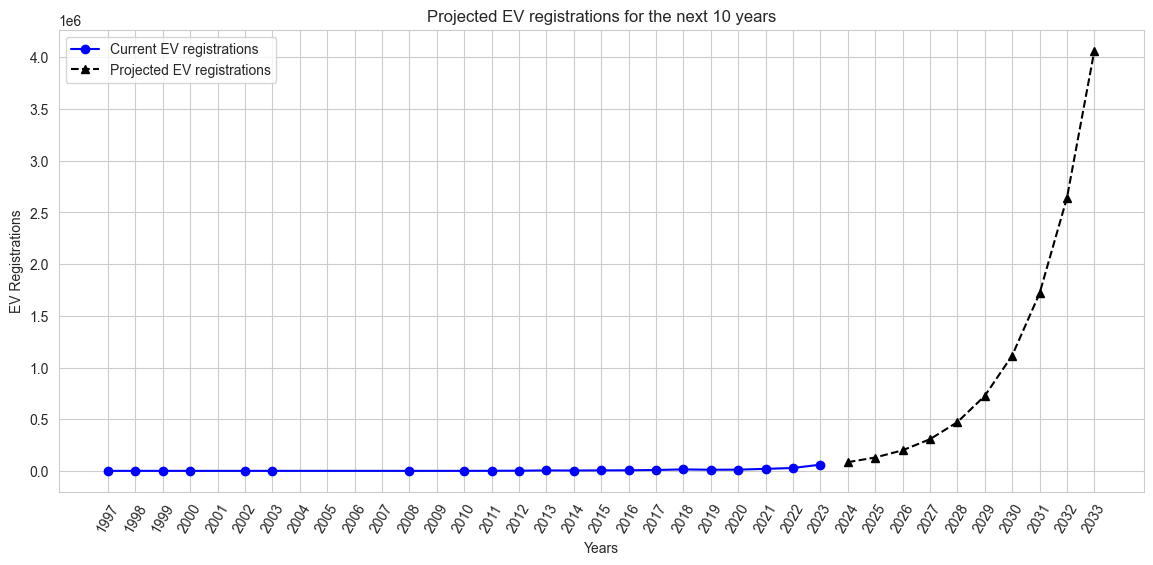

In [20]:
plt.figure(figsize=(14,6))
plt.plot(registration_counts_df.index,registration_counts_df["count"],linestyle="solid",marker="o",color="blue",label="Current EV registrations")
plt.plot(forecasted_data["year"],forecasted_data["projected_EV_registrations"],linestyle="dashed",marker="^",color="black",label="Projected EV registrations")
plt.title("Projected EV registrations for the next 10 years")
plt.xlabel("Years")
plt.ylabel("EV Registrations")
plt.xticks(np.arange(1997,2034,1))
plt.xticks(rotation=60)
plt.legend()
plt.show()